<a href="https://colab.research.google.com/github/wavaronr/MetodosNumericos/blob/main/G73_WilmerVaron_Ej1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Curso**: *Metodos Numericos*

**Tarea:** *Tarea 1 Teoría de Errores y Solución de Ecuaciones No Lineales*

**Presentado por:** *Wilmer Alexander Varon Rodriguez*

**Grupo:** *73*

**Codigo:** *1013601371*

**Presentado a:** *Henock Venegas*

**Universidad Nacional Abierta y a Distancia – UNAD** 
Fecha: 18 de Marzo de 2023
---



_________________________________________
_________________________________
# **Presentación del ejercicio en una celda markdown.**

Ejercicio 1: Fundamentos de programación

Desarrolle un código Python en la herramienta Google Colab que calcule las siguientes Sumas de Riemann, según su elección de letra.

B: La Suma de Riemann del punto medio.

 

$$f\left(x\right)=\mathrm e^{\left(\frac{3\mathrm x}5\right)}+2$$



En el intervalo [0,3]. Y las aproximaciones que se deben generar están determinadas por las particiones de la siguiente tabla con su
respectivo error porcentual.

___

#**Revisión teórica de las Sumas de Riemann**

Teniendo en cuenta lo solicitado por el presente ejercicio se define los siguientes conceptos 

La suma de Riemann esta definida como la sumatoria de n cantidad de   rectacgulos debajo la curva los cuales dependiendo de sus dimensiones o su punto de referencia puede disminuir o aumentar el margen de error con respecto al area que ocupa la funcion en determinado segmento de la grafica.

Importante destacar que la elección de los puntos en cada subintervalo puede afectar la precisión de la aproximación, y que existen diferentes tipos de sumas de Riemann (izquierda, derecha, media, etc.) según la elección de los puntos. También hay otros métodos más sofisticados, como las sumas de Riemann de funciones escalonadas, que se utilizan para aproximar la integral de funciones más complejas. Ademas debemos tener presente que hay algunas restricciones en cuanto a la integrabilidad de la función, es decir, si la función tiene singularidades o discontinuidades en el intervalo, puede ser necesario utilizar métodos más avanzados para aproximar la integral.

a continuacion muestro la formula y la explicacion de su aplicacion 

$\textstyle\overset n{\underset{i=1}{\sum f(x_i)\triangle x}}$

Donde $\triangle x$ corresponde a $\frac{b-a}n$ donde b y a son los limites en en el eje x debajo de la curva y n es el numero de rectangulos en los vamos a dividir el area a calcular adicional debemos tener presente el punto de referencia de donde vamos a medir el rectagulo es decir, si se trata punto izquierdo, punto medio, etc, para el presente ejercicio se tomará ${x_i}$ calcualdo en punto medio de la siguiente manera $\frac{x_1+x_2}2$ entonces teniendo presente que el area de un rectangulo es base por altura por lo tanto se toma el $f(x_i)$ como la altura y la base corresponde al $\triangle x$ y la sumatoria de estas areas nos permite realizar el calculo aproximado del area bajo la curva de igual forma directamente proporcional a la cantidad de n que nos permite acercarnos al valor real 

Es importante resaltar que este es el principio fundamental para la integrales donde el $\triangle x$ teniendo en cuenta su proporcionalidad con respecto a n esta al llevarla con el limite con tendencia al infinito podemos hacer que esta area sea el valor real.


___

#**Referencias**

Martín García, L. J., & Velasco Mate, J. A. (2001). Sumas de Riemann con sistemas de cálculo simbólico. Suma. Recuperado de https://redined.educacion.gob.es/xmlui/bitstream/handle/11162/13614/047-052.pdf?sequence=1&isAllowed=y

Talens Oliag, P. (2021). Cálculo del área bajo una curva: la suma de Riemann. Recuperado de https://riunet.upv.es/bitstream/handle/10251/164613/Talens%20-%20C%C3%A1lculo%20del%20%C3%A1rea%20bajo%20una%20curva:%20la%20suma%20de%20Riemann.pdf?sequence=1







In [ ]:
from numpy import exp

def f(x): #funcion del ejecicio
    return exp((3 * x )/ 5) + 2

a = 0   # Extremo izquierdo del intervalo
b = 3   # Extremo derecho del intervalo
n = 1   # Número de subintervalos
vlrExacto = 14.4160791073549 #Valor calucula de la integral en geogebra


def sumaRiemann(n): #Funcion de suma Riemann recibe la f(x) 
  dx = (b - a) / n #ancho del rectangulo
  xm = a + dx / 2 # calculo del valor de x del punto medio
  sumatoria = 0
  for i in range(n):
    sumatoria += f(xm + i*dx) # calculo de valor 
  resultado = dx * sumatoria
  return resultado

def errorPor(resultado): #Funcion retorna el error relativo con respecto al n de subintervalos
  return (abs(((vlrExacto-resultado)/vlrExacto))*100)

def errorMenor():
  n_int = False
  j=0
  while n_int == False: 
    j+=1
    if(errorPor(sumaRiemann(j))<=0.001): # este condicional itera hasta encontrar que el error sea menor 0.001 y retorna el valor de n
      n_int= True
      return j


**Los Resultados tabulados aplicando la funcion en n = 4, n = 10, n = 700, n = 6000 y el calculo de n siempre y cuando el error sea menor a 0.001** 

In [ ]:
from tabulate import tabulate

print("El intervalo que tiene un error relativo menor al 0.001%","El valor de n debe ser de:", errorMenor(),"\n")
#Lista para la tabulacion de los datos a evaluar
listRiemman = [[4,sumaRiemann(4),errorPor(sumaRiemann(4))],[10,sumaRiemann(10),errorPor(sumaRiemann(10))],[700,sumaRiemann(700),errorPor(sumaRiemann(700))],[6000,sumaRiemann(6000),errorPor(sumaRiemann(6000))],[errorMenor(),sumaRiemann(errorMenor()),errorPor(sumaRiemann(errorMenor()))]]

print(tabulate(listRiemman,headers=["Evaluado","Resultado","Error %"],tablefmt = "francy_grid",floatfmt=(".1f", ".13f", ".13f"))) 



El intervalo que tiene un error relativo menor al 0.001% El valor de n debe ser de: 89 

  Evaluado         Resultado          Error %
----------  ----------------  ---------------
         4  14.3454856193925  0.4896857698732
        10  14.4047281282104  0.0787383244777
       700  14.4160767886397  0.0000160842291
      6000  14.4160790757946  0.0000002189244
        89  14.4159356712831  0.0009949728406


Grafica a los 4 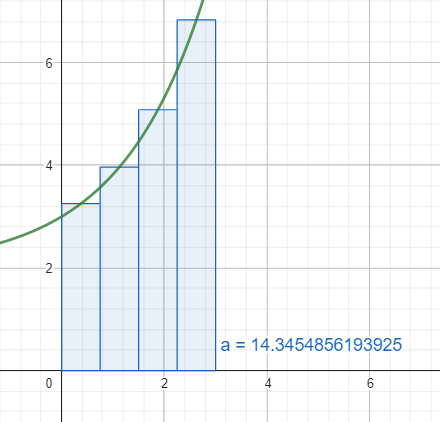

Grafica a los 10 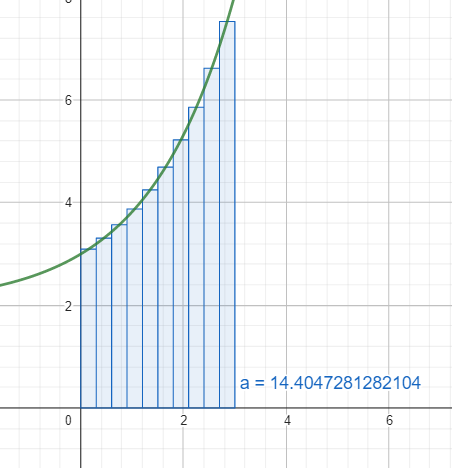

Grafica a los 700 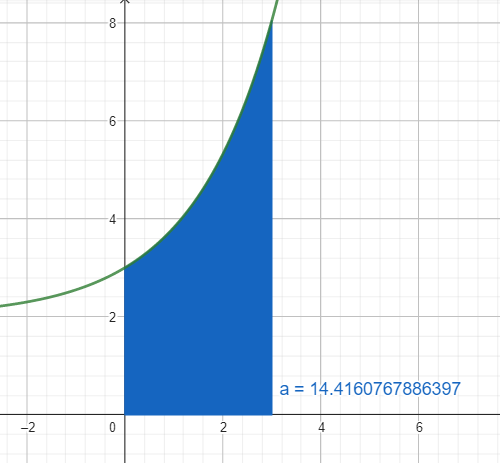

Grafica a los 6000 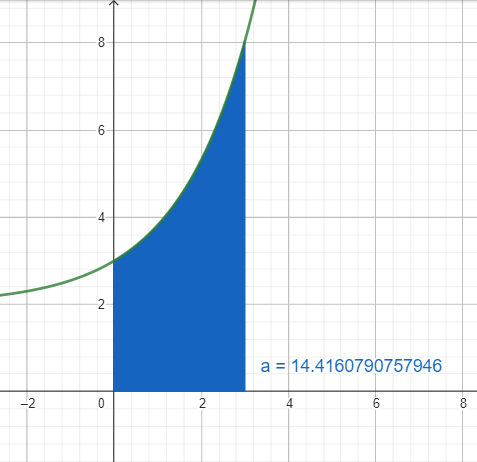

# Conclusión
Aplicando el metodo de Riemman a la funcion propuesta en especiifico para el presente ejercicio se podria determinar que no requiere de muchos subintervalos para obtener un valor cercano a la realidad, es posible que se deba la baja pronunciacion de la linea curva que permite que el rectangulo de punto medio se acerque a la realidad con solo 89 subintervalos, claro esta que dependiendo de la necesidad de precisión  